Month Distribution:
 month
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: count, dtype: int64

Day Distribution:
 day
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: count, dtype: int64


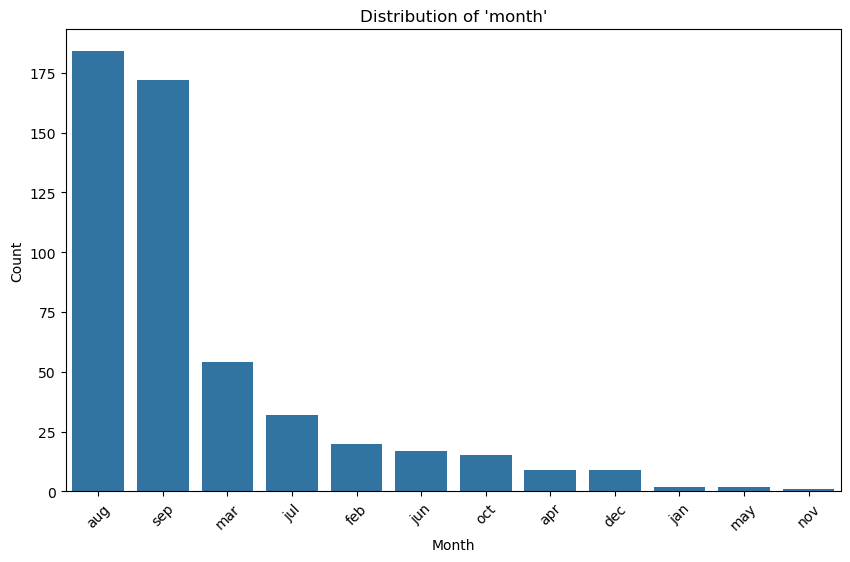

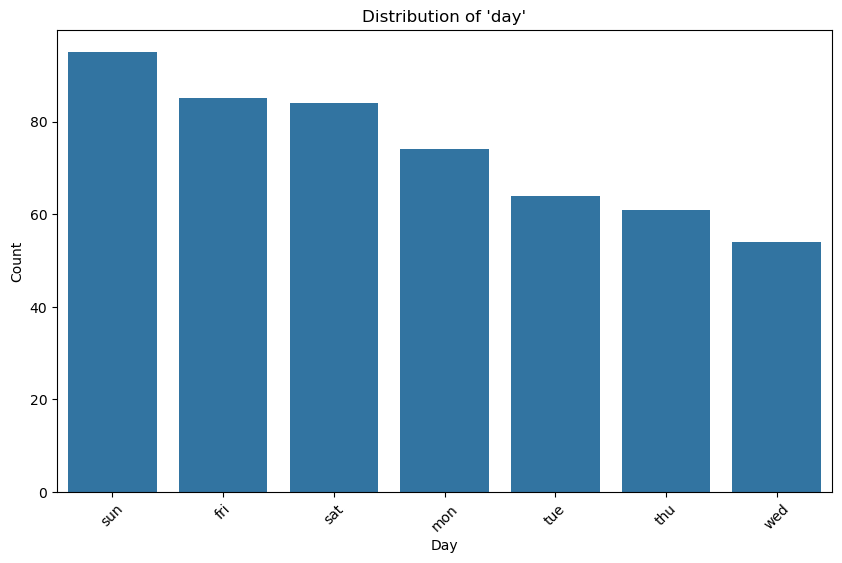

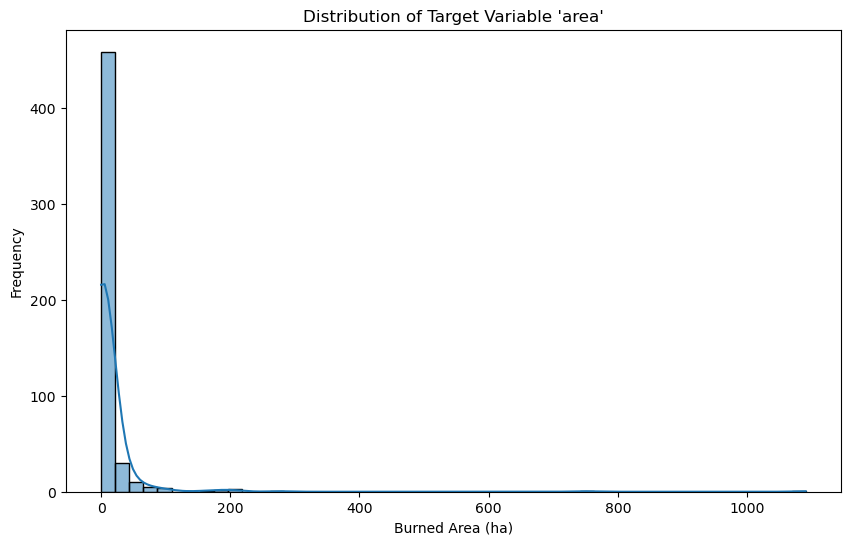

Target Variable Statistics:
count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64

Proportion of zero or near-zero values in target variable: 53.00%


In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
from ucimlrepo import fetch_ucirepo

forest_fires = fetch_ucirepo(id=162)
X = forest_fires.data.features
y = forest_fires.data.targets.squeeze()  # Ensure y is a Series

# Step 1: Check for Class Imbalance

# Count the number of instances for each category in 'month' and 'day'
category_counts_month = X['month'].value_counts()
category_counts_day = X['day'].value_counts()

# Print the counts for 'month' and 'day'
print("Month Distribution:\n", category_counts_month)
print("\nDay Distribution:\n", category_counts_day)

# Visualize 'month' and 'day' distributions
plt.figure(figsize=(10, 6))
sns.countplot(data=X, x='month', order=category_counts_month.index)
plt.title("Distribution of 'month'")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=X, x='day', order=category_counts_day.index)
plt.title("Distribution of 'day'")
plt.xlabel("Day")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Analyze the target variable 'area'
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=50, kde=True)
plt.title("Distribution of Target Variable 'area'")
plt.xlabel("Burned Area (ha)")
plt.ylabel("Frequency")
plt.show()

# Check if the target variable 'area' is skewed
print("Target Variable Statistics:")
print(y.describe())

# Detect the proportion of zero or near-zero values in 'area'
zero_near_zero_proportion = ((y <= 1).sum() / len(y)) * 100
print(f"\nProportion of zero or near-zero values in target variable: {zero_near_zero_proportion:.2f}%")
